# Data Augmentation

To improve generalization, one common technique is to use data augmentation  
*Data augmentation* generates similar but distinct training examples after a series of random changes to the training images, thereby expanding the size of the training set  
Random tweaks of training examples allow models to less rely on certain attributes, thereby improving their generalization ability

In [1]:
%matplotlib inline
import torch
import torchvision
from torch import nn
from d2l import torch as d2l
d2l.set_figsize((7.0, 10.0))

def apply(img, aug, num_rows=2, num_cols=4, scale=5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    d2l.show_images(Y, num_rows, num_cols, scale=scale)

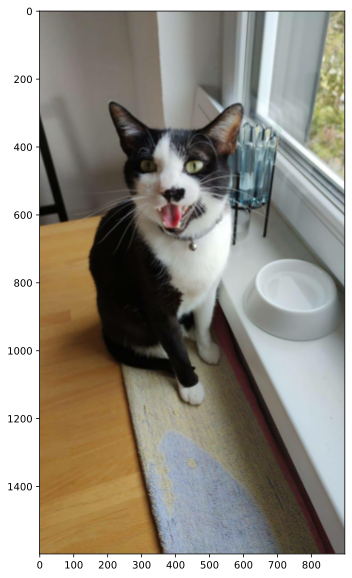

In [2]:
img = d2l.Image.open('images/IMG-20210422-WA0005.jpg')
d2l.plt.imshow(img);

Data augmentation is applied with some degree of randomness 

One of the most used data augmentation technique is to do an horizontal flip, as it usually doesn't change the category of the object. Except if there is text or number.

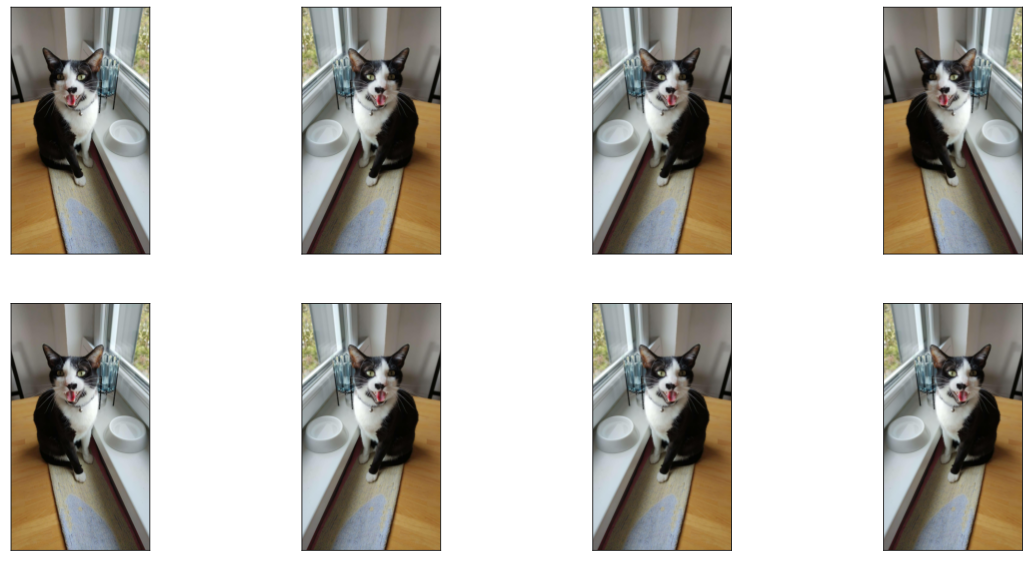

In [3]:
h_transformation = torchvision.transforms.RandomHorizontalFlip(p=0.5)
apply(img, h_transformation) #apply here is just to illustrate

Vertical flip is less common but it also exist

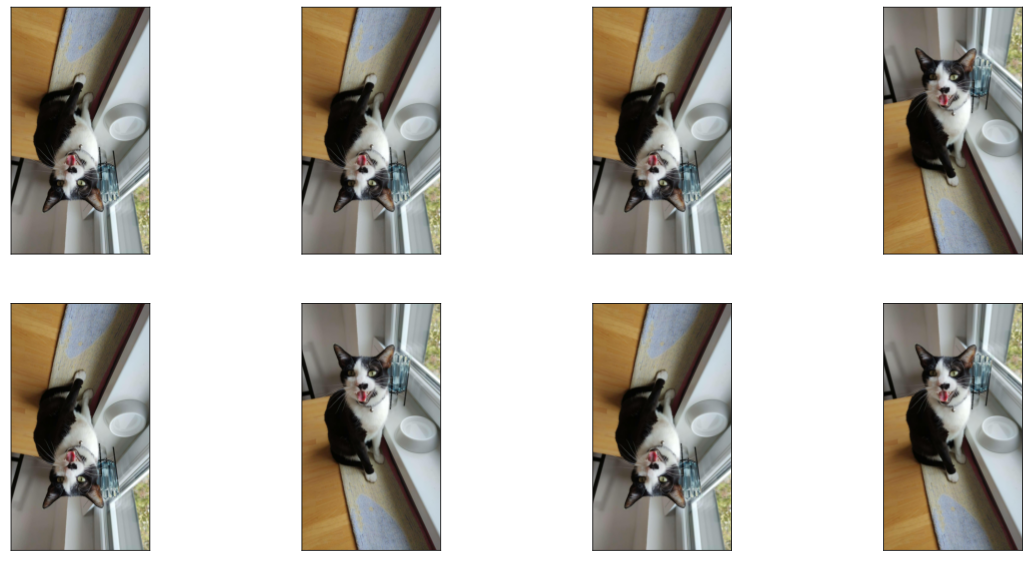

In [4]:
v_transformation = torchvision.transforms.RandomVerticalFlip(p=0.5)
apply(img, v_transformation) #apply here is just to illustrate

The element we want to detect might not always be in the center of the image

Random crop can help to make the NN invariant to the position of the element

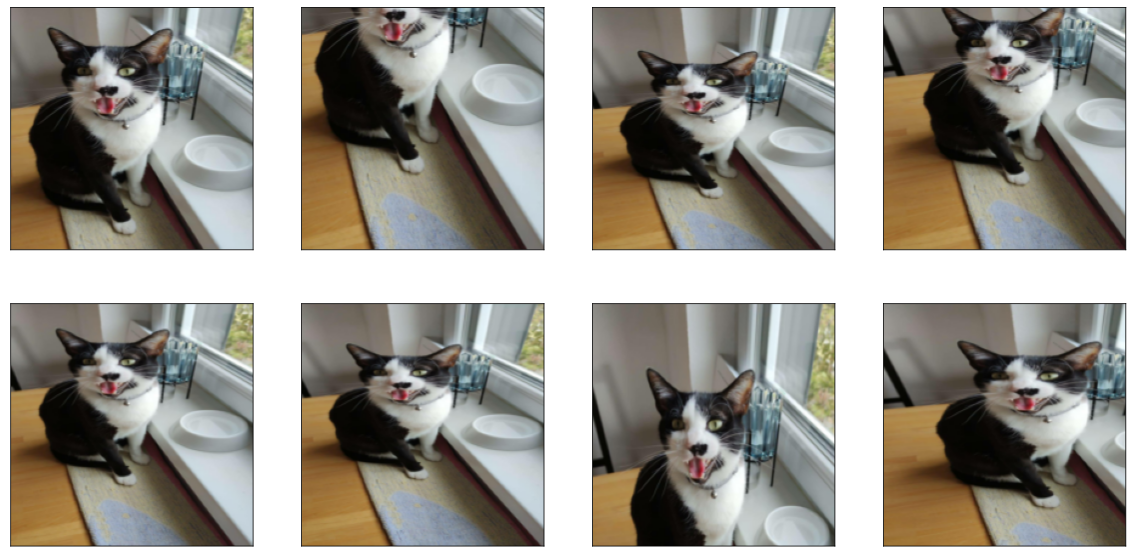

In [5]:
shape_aug = torchvision.transforms.RandomResizedCrop(
    (200, 200), scale=(0.5, 1), ratio=(0.5, 2)) # crop area between 50% and 100% of the image
# change the size of the image to 200 by 200
# ratio is applied on the image for the width and then height before resizing
apply(img, shape_aug) 

One common issue is that the network may rely too much on the color to identify and element  
For example, to determine if the picture contains a dog or a wolf, one bias is to check if there is snow in the background

Color Jitter alter the brightness, contrast, saturation and hue of the image to prevent this phenomenon

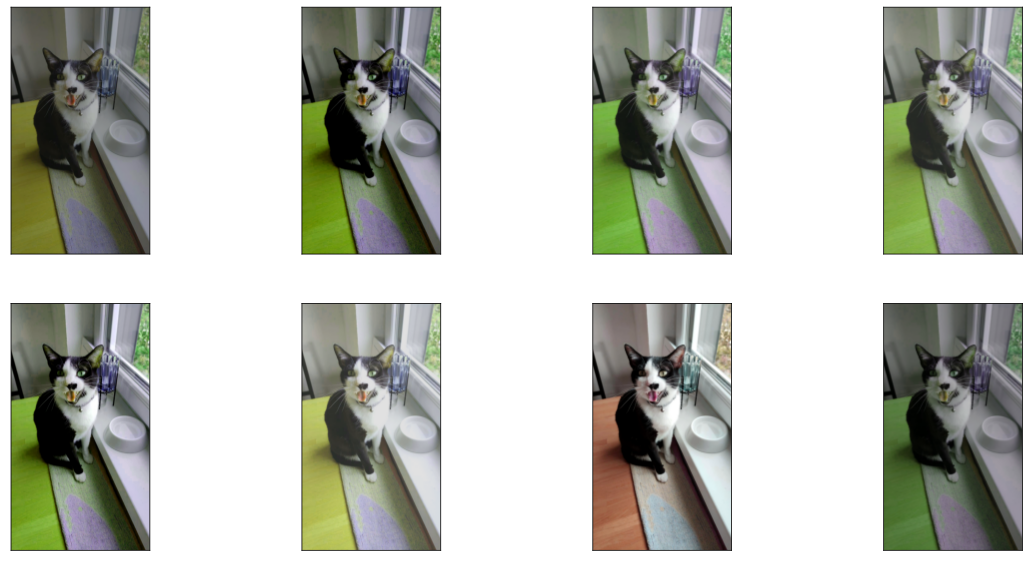

In [6]:
jitter = torchvision.transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3,
                                       hue=0.2)
apply(img, jitter) 

We can also combine multiple transformation together

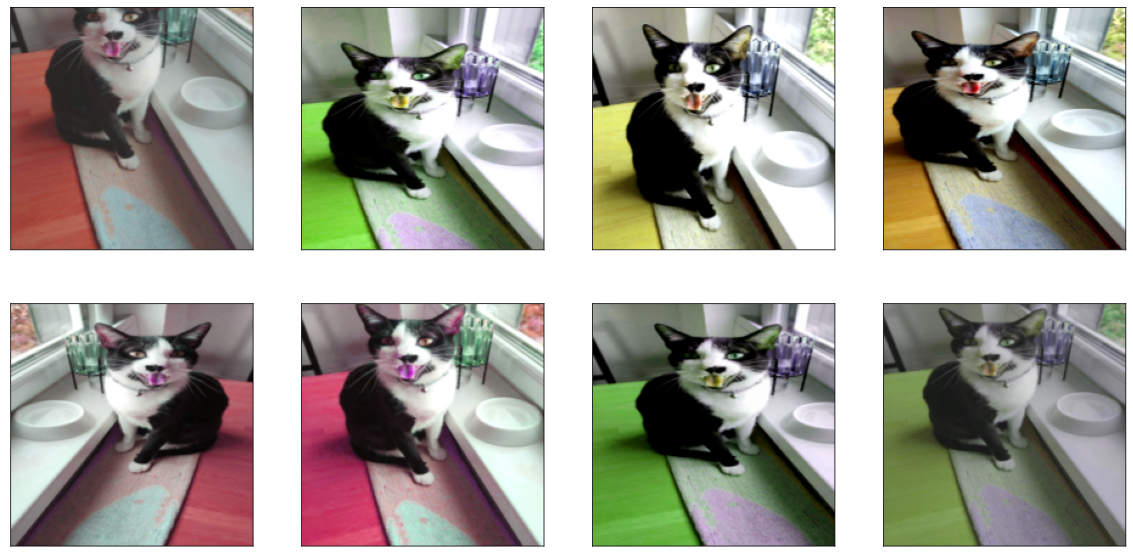

In [7]:
augs = torchvision.transforms.Compose([
    h_transformation, shape_aug, jitter])
apply(img, augs) 

You can pass the augmentation directly to the `Dataset` to be applied automatically

We don't apply augmentation to the test set! Only on the training set

In [8]:
train_augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomResizedCrop((32, 32), scale=(0.5, 1), ratio=(0.5, 2)),
    torchvision.transforms.ToTensor()])

test_augs = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()])

train_dataset = torchvision.datasets.CIFAR10(root="data", train=True,
                                           transform=train_augs, download=True)
test_dataset = torchvision.datasets.CIFAR10(root="data", train=False,
                                           transform=test_augs, download=True)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


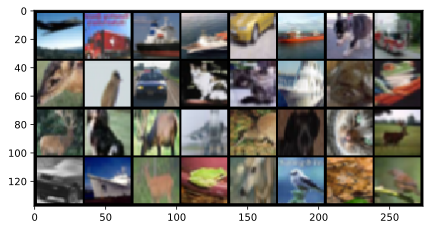

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

images, labels = next(iter(train_dataloader))
grid = torchvision.utils.make_grid(images, nrow=8)
show(grid)